# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### The Website

Used automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

In [3]:
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Table Scraper
Create a Beautiful Soup object and use it to scrape the data in the HTML table.
Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
#Beautiful Soup Object
html = browser.html
bsoup = soup(html,'html.parser')

In [8]:
#Extract all rows of data
row_info = bsoup.find_all('tr',class_='data-row')

### Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [12]:
#Empty list
all_rows = []
# Loop through the scraped data to create a list of rows
for rows in row_info:
    td = rows.find_all('td')
    rows  = [col.text for col in td]
    all_rows.append(rows)

In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(all_rows, columns = ["id","terrestrial_date","sol","ls","month","min_temp","pressure"])

In [15]:
# Confirm DataFrame was created successfully
df.describe()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
count,1867,1867,1867,1867,1867,1867,1867
unique,1867,1867,1867,360,12,29,199
top,2,2012-08-16,10,96,4,-77.0,850.0
freq,1,1,1,8,194,138,25


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


### Data preparation for analysis

Data type examination that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Pandas used `astype` and `to_datetime` methods to accomplish this task.**


In [17]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [20]:
# Change data types for data analysis
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)
df.sol = df.sol.astype('int')
df.ls = df.ls.astype('int')
df.month = df.month.astype('int')
df.min_temp = df.min_temp.astype('float')
df.pressure = df.pressure.astype('float')

In [21]:
# Type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Data Analysis

Analyze your dataset by using Pandas functions to answer the following questions:
Considering the following:
1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
    * The average the minimum daily temperature for all of the months.
4. Which months have the lowest and the highest atmospheric pressure on Mars? 
    * Average the daily atmospheric pressure of all the months.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * How many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [22]:
# 1. How many months are there on Mars?
df["month"].value_counts()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [24]:
# 2. How many Martian days' worth of data are there?
martian_days = df.sol.nunique()
martian_days


1867

In [25]:
# 3. What is the average low temperature by month?
low_temp_by_month = df.groupby('month')['min_temp'].mean()
low_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Celsius')

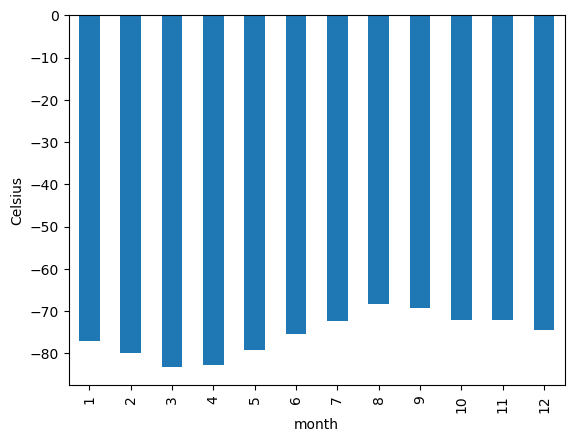

In [28]:
# Plot the average temperature by month
low_temp_by_month.plot(kind='bar')
plt.ylabel('Celsius')

Text(0, 0.5, 'Celsius')

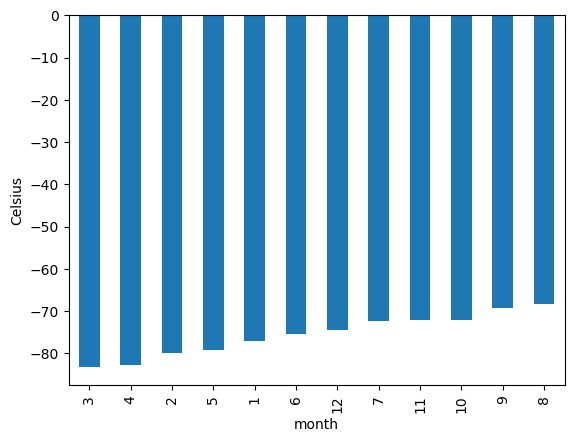

In [29]:
# Identify the coldest and hottest months in Curiosity's location
low_temp_by_month.sort_values().plot(kind='bar')
plt.ylabel('Celsius')

In [30]:
# 4. Average pressure by Martian month
mars_pressure = df.groupby('month')['pressure'].mean()
mars_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<AxesSubplot:xlabel='month'>

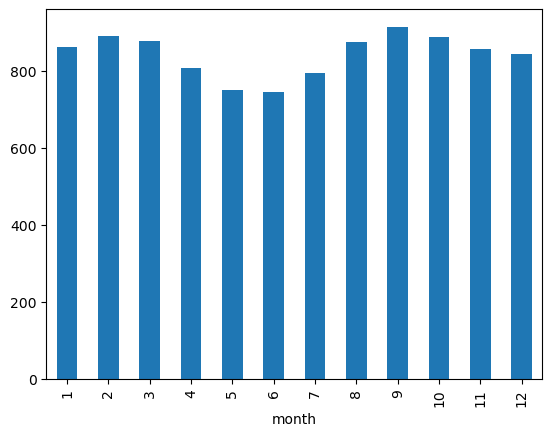

In [32]:
# Plot the average pressure by month
mars_pressure.plot(kind="bar")

Text(0, 0.5, 'temp')

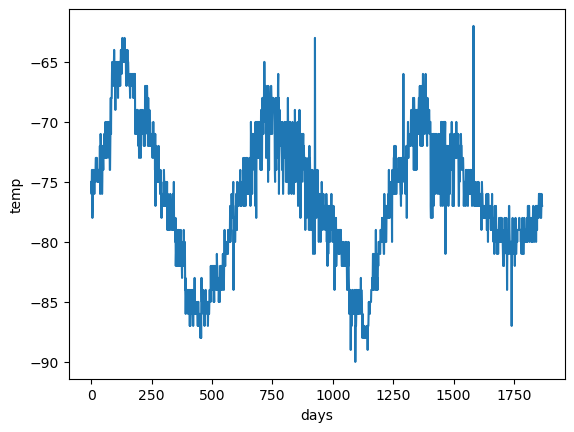

In [33]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df.min_temp.plot()
plt.xlabel('days')
plt.ylabel('temp')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [34]:
#Data to a CSV
df.to_csv('mars_dd.csv',index=False)

In [ ]:
browser.quit()